In [1]:
%run ../convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Problem 1

<h2>Task</h2>
Train a <code>LinearSVC</code> on a linearly separable dataset. Then train an <code>SVC</code> and a
<code>SGDClassifier</code> on the same dataset. See if you can get them to produce roughly
the same model.
<h2>Solution</h2>

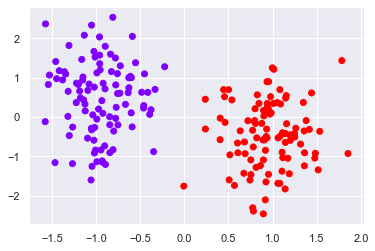

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X, y = make_blobs(n_samples = 200,centers = 2, cluster_std = 1.2, random_state = 7)
X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'rainbow')

In [3]:
from sklearn.svm import LinearSVC
lin_clf = LinearSVC(C = 10000)
lin_clf.fit(X, y)
lin_clf.coef_, lin_clf.intercept_

(array([[ 4.55914751, -0.50220776]]), array([0.14388132]))

In [4]:
def plot(model):
    (a, b), c = model.coef_[0], model.intercept_[0]
    xt = np.linspace(-12, 3)
    yt = (-c - a * xt) / b
    yt1 = (1 - c - a * xt) / b
    yt2 = (-1 - c  - a * xt) /b
    plt.scatter(X[:,0], X[:,1], c = y, cmap = 'rainbow')
    plt.plot(xt, yt, color = 'g')
    plt.plot(xt, yt1, ls = '--', color = 'k')
    plt.plot(xt, yt2, ls = '--', color = 'k')
    plt.axis([-3, 3,-3, 3])

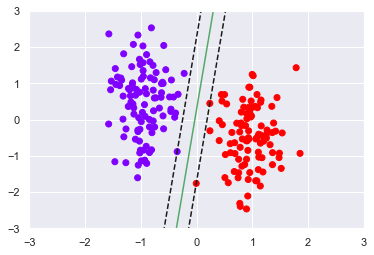

In [5]:
plot(lin_clf)

In [6]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C = 10000)
clf.fit(X, y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

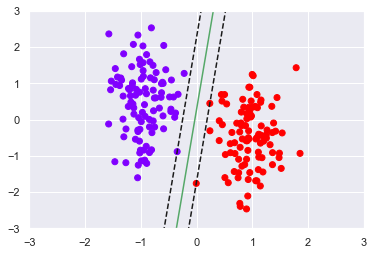

In [7]:
plot(clf)

In [8]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha = 1e-10, tol = -np.infty)
clf.fit(X, y)
clf.coef_, clf.intercept_

(array([[ 970.22474276, -132.23655696]]), array([-4.00016506e-05]))

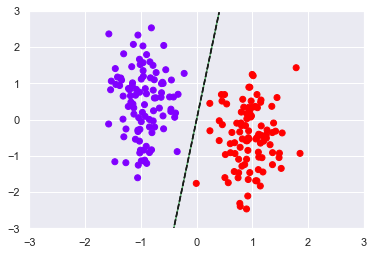

In [9]:
plot(clf)

# Problem 2

<h2>Task</h2>
Train an SVM regressor on the California housing dataset.
<h2>Solution</h2>

In [10]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [11]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [12]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
pipe = make_pipeline(StandardScaler(), LinearSVR())
grid_params = {'linearsvr__C' : [.0001, .001, .01, .1, 1, 10, 100, 1000]}
grid = GridSearchCV(pipe, grid_params, cv = 10, scoring = 'neg_mean_squared_error')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, train_size = .8, random_state = 42)

In [14]:
grid.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linearsvr',
                                        LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                                  fit_intercept=True,
                                                  intercept_scaling=1.0,
                                                  loss='epsilon_insensitive',
                                                  max_iter=1000,
                                                  random_state=None, tol=0.0001,
                                                  verbose=0))],
                                verbose=False),
             iid='warn

In [15]:
grid.best_score_

-0.6947016822274532

In [16]:
grid.best_params_

{'linearsvr__C': 0.001}

In [17]:
from sklearn.metrics import mean_squared_error
y_pred = grid.predict(X_test)
MSE = mean_squared_error(y_pred, y_test)
MSE

0.6236974544277889

(0, 500)

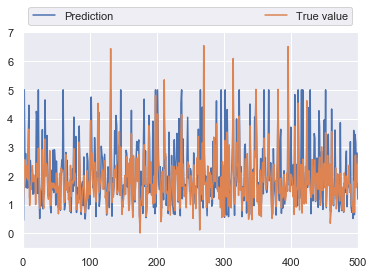

In [18]:
xt = range(len(y_test))
plt.plot(xt, y_test, label = 'Prediction')
plt.plot(xt, y_pred, label = 'True value')
plt.legend(bbox_to_anchor = (0, 1, 1,1), mode = 'expand', loc = 'lower left', ncol = 2)
plt.xlim(0, 500)

Let's look at the RMSE:

np.sqrt(MSE)
In this training set, the targets are tens of thousands of dollars. 
The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): 
    so with this model we can expect errors somewhere around $7,900. Not great.
    Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for C and gamma:

In [22]:
from scipy.stats import uniform,reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
pipe = make_pipeline(StandardScaler(), SVR())
param_dist = {'svr__C' : uniform(1, 10), 'svr__gamma' : reciprocal(0.001, 0.1)}
grid = RandomizedSearchCV(pipe, param_dist, cv = 3, n_iter = 10, random_state = 42)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('svr',
                                              SVR(C=1.0, cache_size=200,
                                                  coef0=0.0, degree=3,
                                                  epsilon=0.1,
                                                  gamma='auto_deprecated',
                                                  kernel='rbf', max_iter=-1,
                                                  shrinking=True, tol=0.001,
                                                  verbose=False))],
                                      verbo

In [23]:
grid.best_params_

{'svr__C': 4.745401188473625, 'svr__gamma': 0.07969454818643928}

In [25]:
grid.best_score_

0.7429948094315256

In [28]:
y_pred = grid.predict(X_test)
MSE = mean_squared_error(y_pred, y_test)
MSE

0.3515503774395355

In [27]:
np.sqrt(MSE)

0.5929168385528746

<p class = 'note'>Much more better now !</p>